# Family Members Image Classification using VGG-16 

In [1]:
import os

In [4]:
path = 'test/'

### Renaming the files for all the classes for our ease

In [8]:
path = 'roubish/'
ctr=0
filenames = os.listdir(path)

for file in filenames:
    
    new = 'Roubish'+str(ctr)+'.png'
    old = str(path)+str(file)
    new = str(path) + new
    
    os.rename(old,new)
    ctr+=1

In [7]:
path = 'roubish/'
ctr=0
filenames = os.listdir(path)

for file in filenames:
    
    new = 'Ashirbad'+str(ctr)+'.png'
    old = str(path)+str(file)
    new = str(path) + new
    
    os.rename(old,new)
    ctr+=1

In [10]:
path = 'Ria/'
ctr=0
filenames = os.listdir(path)

for file in filenames:
    
    new = 'Ria'+str(ctr)+'.png'
    old = str(path)+str(file)
    new = str(path) + new
    
    os.rename(old,new)
    ctr+=1

In [11]:
path = 'Maa/'
ctr=0
filenames = os.listdir(path)

for file in filenames:
    
    new = 'Maa'+str(ctr)+'.png'
    old = str(path)+str(file)
    new = str(path) + new
    
    os.rename(old,new)
    ctr+=1

### Model Building

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16, InceptionV3


In [13]:
vgg = VGG16(input_shape=(224,224,3),
           include_top = False,
            weights='imagenet'
           )

for layer in vgg.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 32s 1us/step


In [14]:
x = layers.Flatten()(vgg.output)
x = layers.Dense(512,activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(4,activation='softmax')(x)

model = Model(vgg.input,x)
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Data Augmentation

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'train'
test_dir = 'test'


train_gen = ImageDataGenerator(rescale=1.0/255.0,
                              horizontal_flip=True,
                              vertical_flip=True,
                               width_shift_range=0.3,
                              fill_mode='nearest')
train_set = train_gen.flow_from_directory(train_dir,
                                         batch_size=30,
                                         target_size=(224,224),
                                         class_mode='categorical')

test_gen = ImageDataGenerator(rescale=1.0/255.0)
test_set = test_gen.flow_from_directory(test_dir,
                                       batch_size=20,
                                       target_size=(224,224),
                                       class_mode='categorical')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


### Training the Model

In [16]:
hist = model.fit(train_set,
                validation_data=test_set,
                epochs=100,
                steps_per_epoch=len(train_set),
                validation_steps=len(test_set))

ValueError: Asked to retrieve element 0, but the Sequence has length 0

### Visualizing the Accuracy and Loss

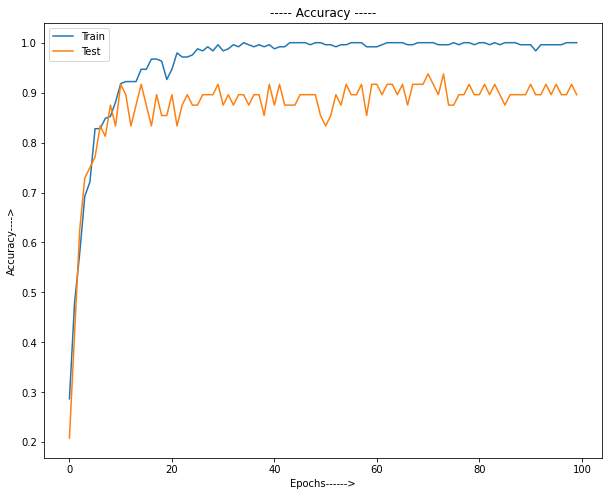

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Train','Test'],loc='best')
plt.xlabel('Epochs------>')
plt.ylabel('Accuracy---->')
plt.title('----- Accuracy -----')
plt.show()

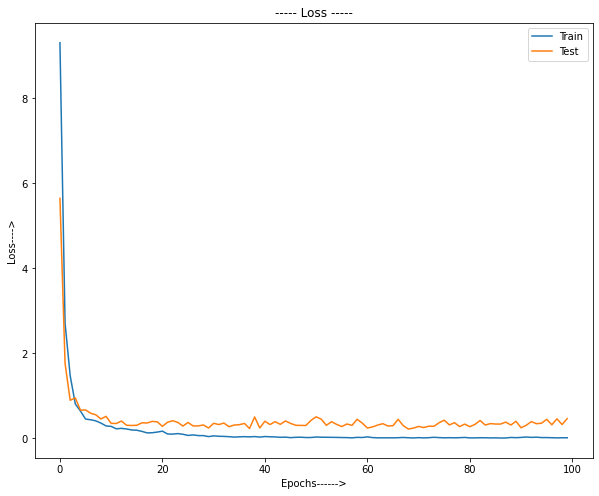

In [31]:
plt.figure(figsize=(10,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Train','Test'],loc='best')
plt.xlabel('Epochs------>')
plt.ylabel('Loss---->')
plt.title('----- Loss -----')
plt.show()

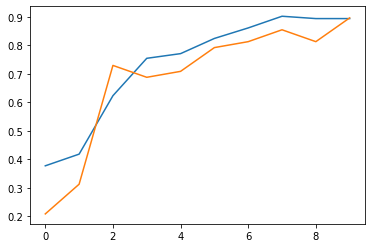

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

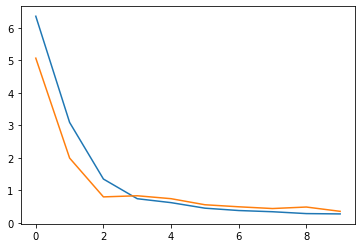

In [106]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

### Saving the Model

In [32]:
model.save('Epoch100.h5')
print('Model Saved Successfully!!!')

Model Saved Successfully!!!


### Prediction on Test Data

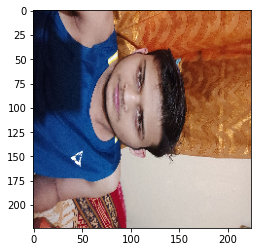

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

data = image.load_img(r'D:\Data Science\Tensorflow-Laurence Moroney\family members prediction\test\Abhishek\Abhishek0.png',target_size=(224,224))
arr = image.img_to_array(data)
#arr = arr/255.0
plt.imshow(data)




In [11]:
arr = np.expand_dims(arr,axis=0)
mod = load_model('Epoch100.h5')
classes = mod.predict(arr)
print(classes,'\n\n')
if (np.argmax(classes)==0) :
    print("This is Abhishek!! ")
    
elif (np.argmax(classes)==1) :
    print('This is Ashirbad!! ')
    
elif (np.argmax(classes)==2) :
    print('This is Maa !!')
    
else :
    print('This is Ria !!')

[[1. 0. 0. 0.]] 


This is Abhishek!! 


In [35]:
classes[0]

array([0., 0., 1., 0.], dtype=float32)

In [36]:
np.argmax(classes)

2